# 16장 이미지 인식의 꽃 - 컨볼루션 신경망(CNN)

### 1.이미지를 인식하는 원리

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('학습셋 이미지 수: %d개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d개' % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


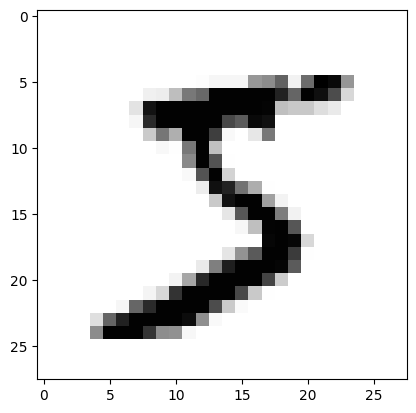

In [5]:
# 이미지 중 한개만 불러오기
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:
# 각 픽셀은 밝기 정도에 따라 0부터 255까지 등급을 매긴다.
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-3s' % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [9]:
# 2차원 배열 -> 1차원 배열
X_train = X_train.reshape(X_train.shape[0], 28 * 28)

In [11]:
# 케라스는 데이터를 0 ~ 1 사이의 값으로 변환후 구동해야 최적의 성능을 낸다. - 정규화(nomalization)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [13]:
# 시험데이터셋 정규화
X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype('float64') / 255

In [14]:
# 숫자 레이블 확인
print('class : %d ' % (y_train[0]))

class : 5 


In [15]:
# 0 ~ 9 정수형 값을 현져 형태에서 0 또는 1로만 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 2.딥러닝 기본 프레임 만들기

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# MNIST 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후 학습셋과 테스트셋 나누기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
# 모델 생성 함수
def model_fn():
  model = Sequential()
  model.add(Dense(512, input_dim=784, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [28]:
# 모델 생성
model = model_fn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# 모델의 최적화
model_path = './MNIST_MLP.keras'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [35]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


# 테스트 정확도 출력
print('\n Test Accuracy : %.4f ' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18181, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18181 to 0.13481, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13481 to 0.10971, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.10971 to 0.09693, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09693 to 0.09276, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09276 to 0.08744, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss did not improve from 0.08744

Epoch 8: val_loss improved from 0.08744 to 0.08399, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.08399

Epoch 10: val_loss improved from 0.08399 to 0.08236, saving model to ./MNIST_MLP.keras

Epoch 11: val_loss did not improve from 0.08236

Epoch 12: val_loss improved from 0.08236 to 0.08187, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss improved from 0.08187 to 0.08145, saving model to ./MN

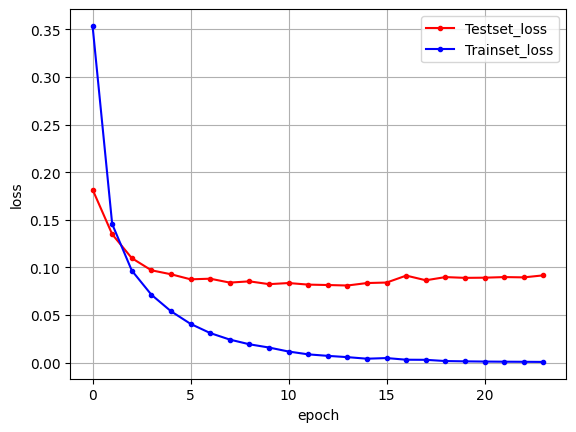

In [36]:
# 검증셋과 학습세 오차 저장
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 확인
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 3.컨볼루션 신경망(CNN) - Convolutional Neural Network
- 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널 도입하는 기법

**커널을 몇개 사용할지, 커널크기, 입력 이미지(행, 열, 채널(흑백,컬러)), 활성화 함수** <br>
- model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))

### 4.맥스 풀링, 드롭아웃, 플래튼
- 풀링: 컨볼루션 층을 통해 이미지 특성 도출 -> 하지만 그 결과가 여전히 크고 복잡하여 다시 한 번 축소
- 드롭아웃: 은닉층에 배치된 노드 중 일부를 임의로 꺼 주는 것
- 플래튼: 2차원 배열을 1차원으로 바꾸어 준다.

### 5.컨볼루션 신경망 실행하기

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [42]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
# 컨볼루션 신경망 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# 모델의 실행 옵션 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# 모델 최적화를 위한 설정 구간
modelpath = './MNIST_CNN.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [47]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08143, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08143 to 0.05372, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05372 to 0.04816, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04816 to 0.04762, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04762 to 0.04743, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss did not improve from 0.04743

Epoch 7: val_loss improved from 0.04743 to 0.04325, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss improved from 0.04325 to 0.03941, saving model to ./MNIST_CNN.keras

Epoch 9: val_loss did not improve from 0.03941

Epoch 10: val_loss did not improve from 0.03941

Epoch 11: val_loss did not improve from 0.03941

Epoch 12: val_loss did not improve from 0.03941

Epoch 13: val_loss did not improve from 0.03941

Epoch 14: val_loss did not improve from 0.03941

Epoch 15: val_loss did not improve from 0.03941

Epoc

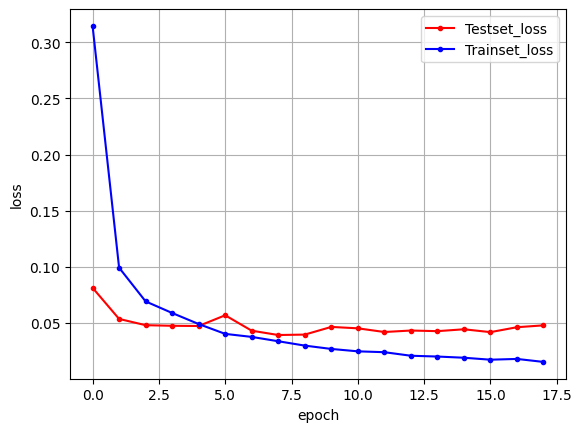

In [48]:
# 검증셋과 학습세 오차 저장
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 확인
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()